In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
import math

In [36]:
df = pd.read_csv("spambase.data")
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Decision
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [37]:
Y = df['Decision'].values
X = df.drop(columns=['Decision']).values

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0, stratify=Y)

In [39]:
def plot_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    sn.heatmap(cf_matrix)

## Naїv Bayes

In [40]:
from sklearn.naive_bayes import BernoulliNB

gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [41]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Success rate: " + str(1 - (y_test != y_pred).sum() / X_test.shape[0]))

Number of mislabeled points out of a total 2301 points : 261
Success rate: 0.8865710560625815


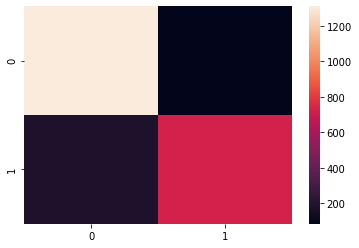

In [42]:
plot_confusion_matrix(y_test, y_pred)

In [43]:
f1_score(y_test, y_pred, average='weighted')

0.8853055915826722

In [44]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.884546526191704

## kNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=100)
y_pred = neigh.fit(X_train, y_train).predict(X_test)

In [46]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Success rate: " + str(1 - (y_test != y_pred).sum() / X_test.shape[0]))

Number of mislabeled points out of a total 2301 points : 652
Success rate: 0.7166449369839201


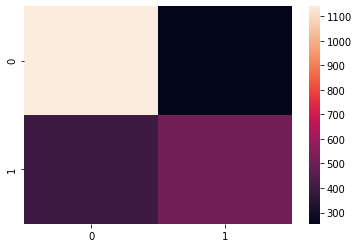

In [47]:
plot_confusion_matrix(y_test, y_pred)

In [48]:
f1_score(y_test, y_pred, average='weighted')

0.7113866729296494

In [49]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.6991030913403602

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.5262998974621735

# SVM

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [52]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Success rate: " + str(1 - (y_test != y_pred).sum() / X_test.shape[0]))

Number of mislabeled points out of a total 2301 points : 157
Success rate: 0.9317687961755758


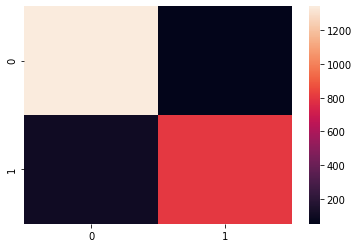

In [53]:
plot_confusion_matrix(y_test, y_pred)

In [54]:
f1_score(y_test, y_pred, average='weighted')

0.9313947564060873

In [55]:
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.9308313352490138

# C4.5 https://github.com/serengil/chefboost

In [56]:
from chefboost import Chefboost as chef
import pandas as pd

config = {'algorithm': 'C4.5'}
model = chef.fit(df, config = config)

-------------------------
finished in  198.99404525756836  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.010432514670723756
MSE:  0.0077157139752227774
RMSE:  0.08783913692211905
RAE:  0.13993143069050287
RRSE:  0.17976080588491403
Mean:  0.39404477287546186
MAE / Mean:  2.647545504688362 %
RMSE / Mean:  22.291664036330374 %


# CART

In [57]:
from chefboost import Chefboost as chef
import pandas as pd

config = {'algorithm': 'CART'}
model = chef.fit(df, config = config)

-------------------------
finished in  228.7787263393402  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.010432514670723756
MSE:  0.0077157139752227774
RMSE:  0.08783913692211905
RAE:  0.13993143069050287
RRSE:  0.17976080588491403
Mean:  0.39404477287546186
MAE / Mean:  2.647545504688362 %
RMSE / Mean:  22.291664036330374 %


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [88]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Success rate: " + str(1 - (y_test != y_pred).sum() / X_test.shape[0]))

Number of mislabeled points out of a total 2301 points : 191
Success rate: 0.9169926119078662


# PCA

In [122]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train, y_train)

PCA(n_components=10)

In [123]:
print(pca.explained_variance_ratio_)

[9.68984056e-01 2.98054413e-02 1.13694005e-03 2.51900461e-05
 8.35478068e-06 6.50767476e-06 5.40717896e-06 2.90171817e-06
 2.54849294e-06 2.11834006e-06]


# Иерархическая кластеризация

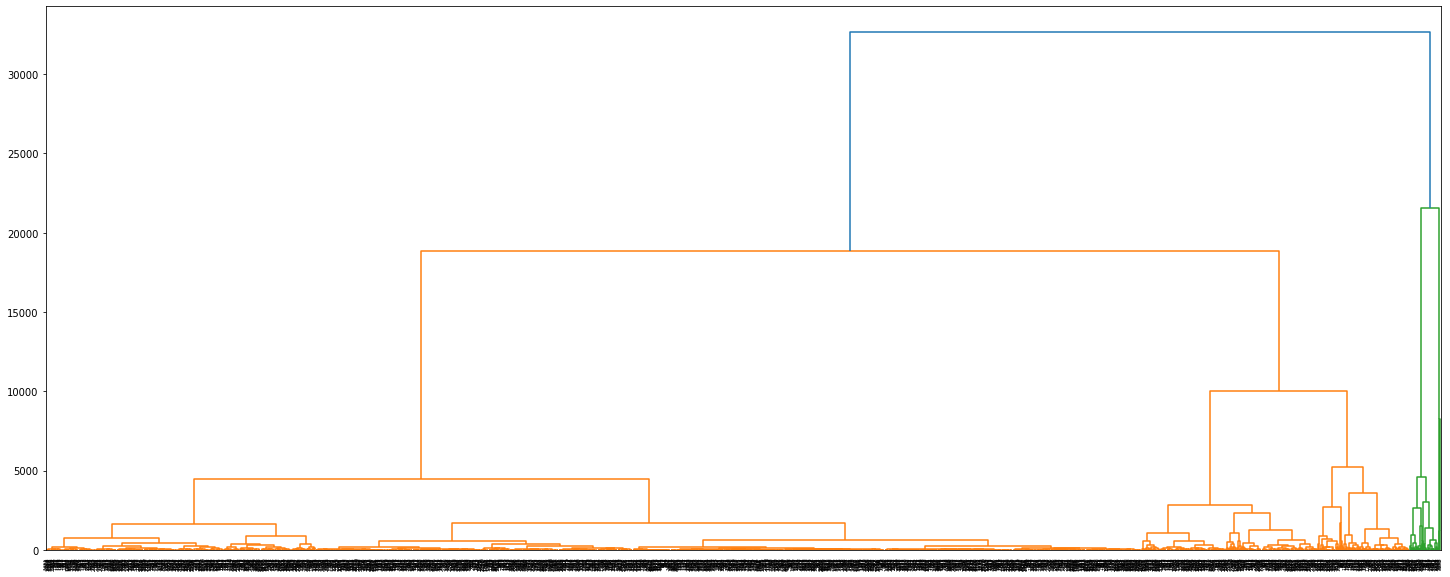

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X_train, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)